In [ ]:
# to import all needed library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# to read dataset and see it's sample
df = pd.read_csv(r'super_store_dataset.csv')

df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## 1. Data Exploratory

### 1.1 Understand Data Structure

In [ ]:
# to get number of rows and columns
df.shape

(9994, 13)

In [ ]:
# to check data type of each columns
df.dtypes

,0
Ship Mode,object
Segment,object
Country,object
City,object
State,object
Postal Code,int64
Region,object
Category,object
Sub-Category,object
Sales,float64


- the data set has 9,994 rows and 13 columns
- there are 'Sales', 'Quantiy', 'Discount', and 'Profit' columns we can use for numerical processing, the others are string type columns.

### 1.2 Check missing values and dupplicates

In [ ]:
# to count number of null value in each columns
df.isnull().sum()

,0
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


In [ ]:
# to count number of dupplicated rows in the dataset
df.duplicated().sum()

np.int64(17)

- there are no columns which have missing value
- there are 17 rows which are exactly the same data (but it is possible, so nothing to do with them)

### 1.3 Check Distribution, Pattern, and Anomilities

In [ ]:
# to get all columns' name, so can help coding easier
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

#### 1.3.1 Sales

In [ ]:
# to get all descriptive statistics of 'Sales' column
df['Sales'].describe()

,Sales
count,9994.000000
mean,229.858001
std,623.245101
min,0.444000
25%,17.280000
50%,54.490000
75%,209.940000
max,22638.480000


<Axes: xlabel='Sales', ylabel='Count'>

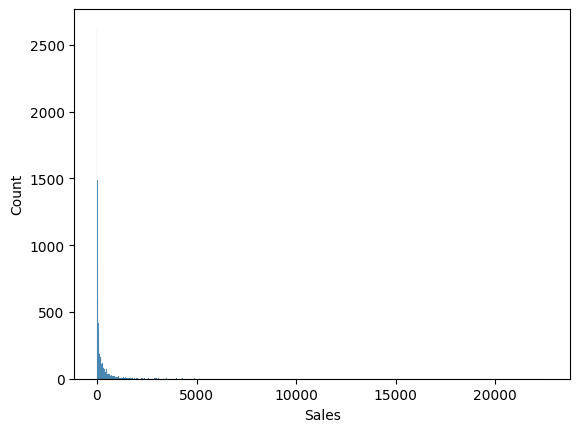

In [ ]:
# to plot histogram of 'Sales' column and see how they distribute
sns.histplot(df['Sales'])

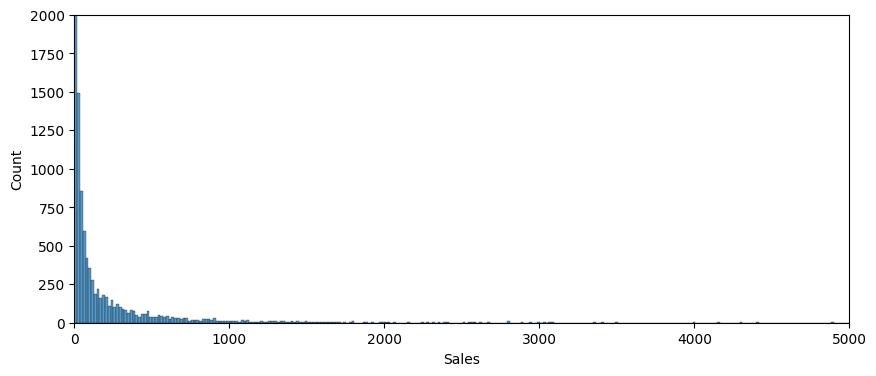

In [ ]:
# to zoom in the chart so, we can see the pattern clearer
plt.figure(figsize=(10, 4))
plt.xlim(0,5000)
plt.ylim(0,2000)
sns.histplot(df['Sales'])
plt.show()

<Axes: xlabel='Sales'>

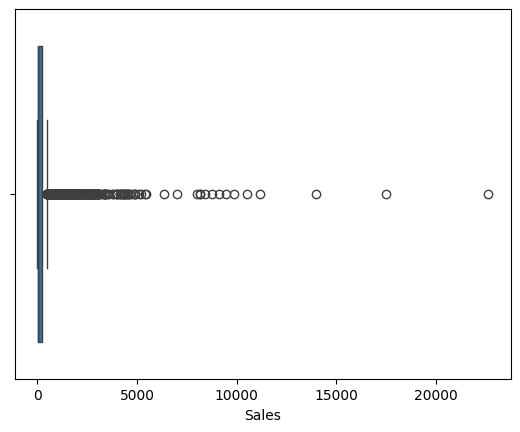

In [ ]:
# to plot boxplot of 'Sales' column to see anormalities
sns.boxplot(x=df['Sales'])

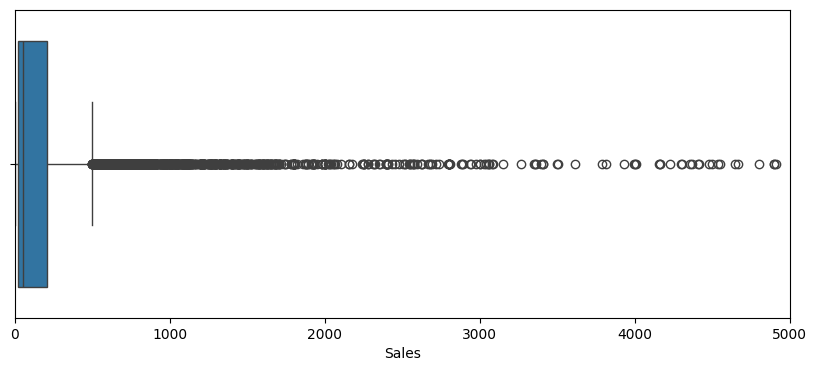

In [ ]:
# to zoom in the chart so, we can see the pattern clearer
plt.figure(figsize=(10, 4))
plt.xlim(0,5000)
sns.boxplot(x=df['Sales'])
plt.show()

- Range of Sales data in very high.
- It's left skew. Most of orders are less than 500 dollars and very high intense at less than 300 dollars.
- There are some order those have very high value compare to others like more than 10,000 dollars. It might need to be check the correctness before continue data processing.

#### 1.3.2 Quantity

In [ ]:
# to get all descriptive statistics of 'Quantity' column
df['Quantity'].describe()

,Quantity
count,9994.000000
mean,3.789574
std,2.225110
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,14.000000


<Axes: xlabel='Quantity', ylabel='Count'>

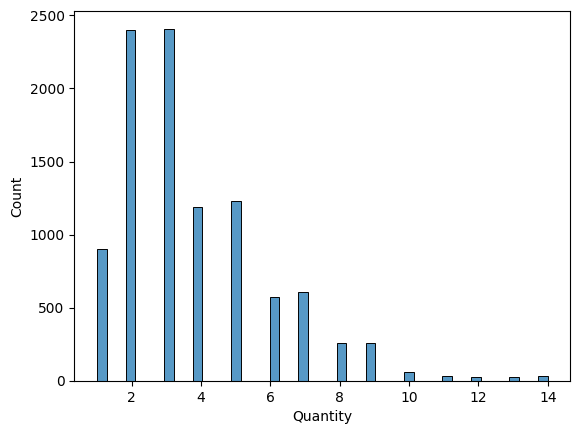

In [ ]:
# to plot histogram of 'Quantity' column and see how they distribute
sns.histplot(df['Quantity'])

<Axes: xlabel='Quantity'>

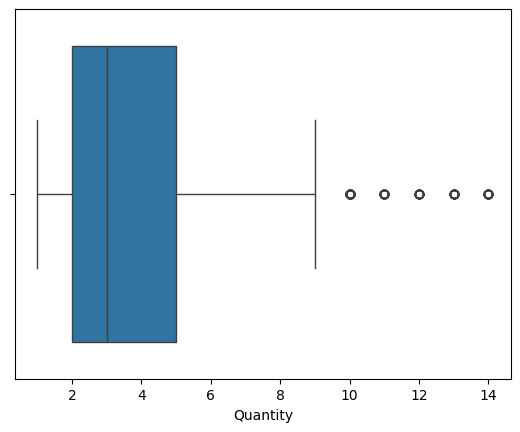

In [ ]:
# to plot boxplot of 'Quantity' column to see anormalities
sns.boxplot(x=df['Quantity'])

- It's left skew. Most of orders contains 2-3 pieces to product.
- For 'Quantity' column, I see no incorrect. It's make sense.

#### 1.3.3 Discount

In [ ]:
# to get all descriptive statistics of 'Discount' column
df['Discount'].describe()

,Discount
count,9994.000000
mean,0.156203
std,0.206452
min,0.000000
25%,0.000000
50%,0.200000
75%,0.200000
max,0.800000


<Axes: xlabel='Discount', ylabel='Count'>

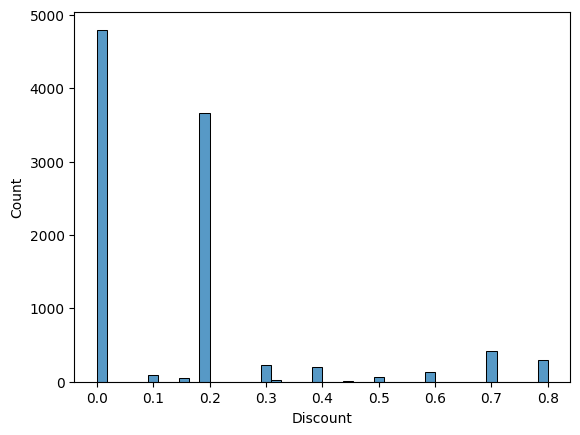

In [ ]:
# to plot histogram of 'Discount' column and see how they distribute
sns.histplot(df['Discount'])

<Axes: xlabel='Discount'>

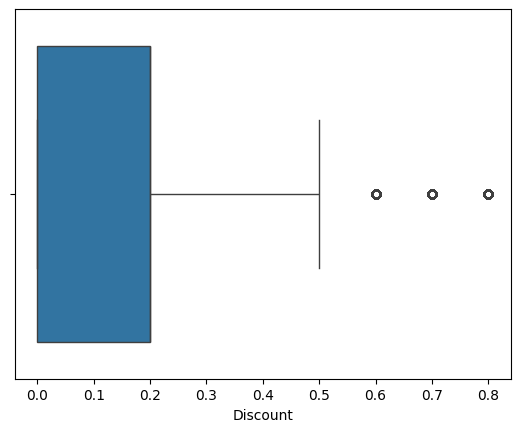

In [ ]:
# to plot boxplot of 'Quantity' column to see anormalities
sns.boxplot(x=df['Discount'])

- It's left skew. Most of orders are no discount and if they get discount the discount are mostly at 20%.
- The stange things I found is that why they are very high discount as 60-80%. So, I think it might need to recheck for data correctness again.

#### 1.3.4 Profit

In [ ]:
# to get all descriptive statistics of 'Profit' column
df['Profit'].describe()

,Profit
count,9994.000000
mean,28.656896
std,234.260108
min,-6599.978000
25%,1.728750
50%,8.666500
75%,29.364000
max,8399.976000


<Axes: xlabel='Profit', ylabel='Count'>

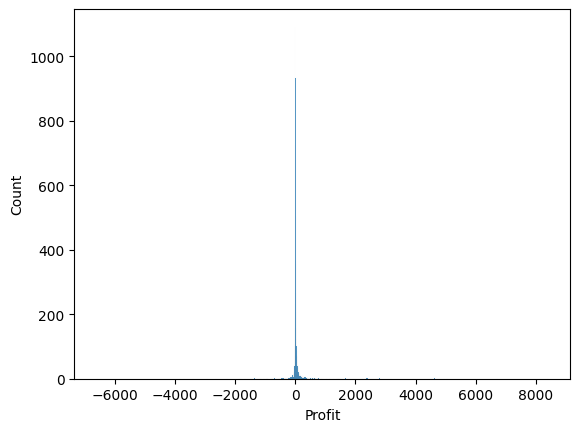

In [ ]:
# to plot histogram of 'Profit' column and see how they distribute
sns.histplot(df['Profit'])

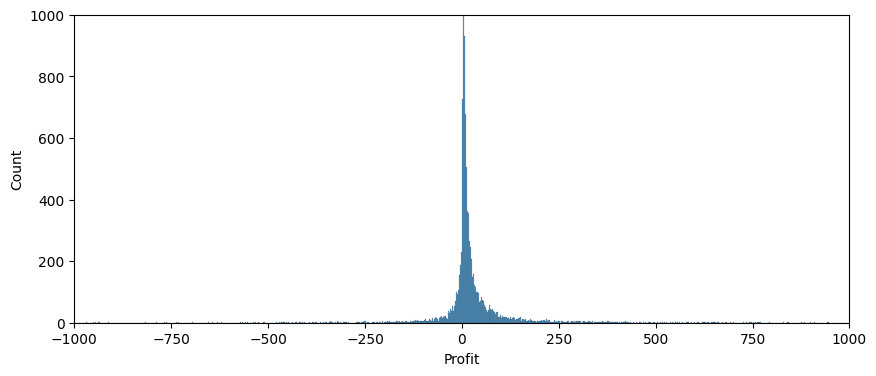

In [ ]:
# to zoom in the chart so, we can see the pattern clearer
plt.figure(figsize=(10, 4))
plt.ylim(0,1000)
plt.xlim(-1000,1000)
sns.histplot(df['Profit'])
plt.show()

In [ ]:
# to count how many order are and are not profit
df_checkprofit = df['Profit'].apply(lambda r: 'zero' if r==0 else ('positive' if r>0 else 'negative')).value_counts()

df_checkprofit

,count
Profit,
positive,8058
negative,1871
zero,65


In [ ]:
# to convert above table into percentage
(df_checkprofit/df_checkprofit.sum())*100

,count
Profit,
positive,80.628377
negative,18.721233
zero,0.650390


- Range of 'Profit' data is very high according to 'Sales' data.
- the distribution is likely to be normal with very high intense orders which have profit less than 100 dollars.
- there are also some very high profit and very high loss compare to others. I think I might randomly check some of them to confirm correctness of the dataset.
- most of orders (80%) makes profit.

### 1.4 Check Incorrect data

#### 1.4.1 City

In [ ]:
# to get all US Cities dataset, I had find from internet
df_city = pd.read_csv('US Cities.csv')

df_city.head()

,city
0,Aaronsburg
1,Abanda
2,Abbeville
3,Abbotsford
4,Abbott


In [ ]:
# to count rows of dataset
# we found that the number of cities I collect is less than real number of cities of USA,
# but I try my best to find already and plan to check the rest manually
df_city.shape[0]

20934

In [ ]:
# to check if there are any city name in the dataset those are not in my cities name dataset I have
df[ ~df['City'].isin(df_city['city']) ]['City'].unique()

array(['New York City', 'Saint Paul', 'Saint Petersburg', 'Saint Peters',
       'Saint Louis', 'Saint Cloud', 'Port Saint Lucie', 'Mcallen'],
      dtype=object)

- I take all these cities names those are not included in my database and use ChatGPT to check and found that these all are real cities in USA. So, the dataset should be correct

#### 1.4.2 State

In [ ]:
# to get all US States dataset, I had find from internet
df_state = pd.read_csv(r'US States.csv')

df_state.head()

,States
0,Alabama
1,Alaska
2,Arizona
3,Arkansas
4,California


In [ ]:
# to count rows of dataset
# I got all states name in USA
df_state.shape[0]

50

In [ ]:
df[ ~df['State'].isin(df_state['States']) ]['State'].unique()

array(['District of Columbia'], dtype=object)

- After check with ChatGPT, I found that 'The District of Columbia' is not a state. It is a federal district. However it still be in USA. So, the dataset should be correct

#### 1.4.3 Postal Code

In [ ]:
# to check how many characters contains in 'Postal Code' and count how many of each of them
df['Postal Code'].apply(lambda r: len(str(r))).value_counts()

,count
Postal Code,
5,9545
4,449


- I found that USA postal code normally has 5 character. Because some of them start with '0', so it was remove when the program change it to integer type when read dataset. So, I have to add '0' at the beginning of those which have 4 characters and covert them back to 'Object' or 'String' type as it should be.

### 1.5 Correlation of columns

In [ ]:
# to see correlation among numeric columns in the dataset
df[['Sales','Quantity','Profit','Discount']].corr()

,Sales,Quantity,Profit,Discount
Sales,1.000000,0.200795,0.479064,-0.028190
Quantity,0.200795,1.000000,0.066253,0.008623
Profit,0.479064,0.066253,1.000000,-0.219487
Discount,-0.028190,0.008623,-0.219487,1.000000


<Axes: >

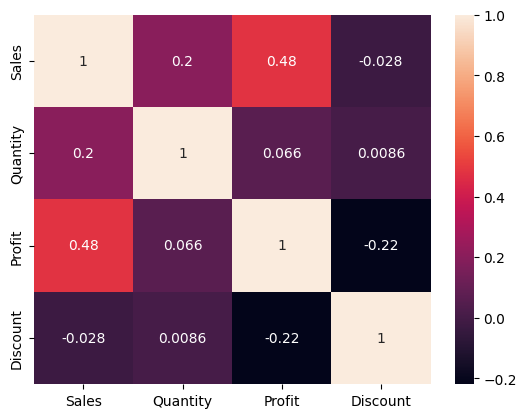

In [ ]:
# to make it visualize with heatmap
sns.heatmap(df[['Sales','Quantity','Profit','Discount']].corr(), annot=True)

- From the heatmap, I found that only 'Sales' column has
moderate positive correlation with 'Profit' columns. The others are not highly correlate to each others.

## 2. Data Cleansing

### 2.1 Postal Code

In [ ]:
# to add '0' in front of 'Postal Code' those have only 4 characters and covert them to string type
df['Postal Code'] = df['Postal Code'].apply(lambda r: str(r) if len(str(r))==5 else '0'+str(r) )

In [ ]:
# to check the result
df['Postal Code'].apply(lambda r: len(r)).value_counts()

,count
Postal Code,
5,9994


In [ ]:
# to export cleaned dataset for continue doing report
df.to_csv('super_store_dataset_clean.csv', index=False)

## 3. Analysis to answer some questions about the dataset

### 3.1 What are cities those have max profit in each states?

In [ ]:
# to get all columns name and make it easier to code
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
# to get total profit of each cities
df_summarize = df.groupby(by=['State','City'])[['Sales', 'Quantity','Profit']].sum()

df_summarize.head()

Sales  Quantity     Profit
State   City                                    
Alabama Auburn      1766.83        16   452.6071
        Decatur     3374.82        52  1000.0881
        Florence    1997.35        24   248.6589
        Hoover       525.85        15    18.7173
        Huntsville  2484.37        40  1005.2572

In [ ]:
# to get only the city which has maximum profit in each states
df_summarize = df_summarize.reset_index()
df_maxprofit =  df_summarize.groupby(by=['State'])['Profit'].max().reset_index()
df_citymaxpf = pd.merge(df_maxprofit , df_summarize, how='left',on=['State','Profit'])
df_citymaxpf  = df_citymaxpf [['State','City','Profit']]
df_citymaxpf .head()

,State,City,Profit
0,Alabama,Mobile,2175.8292
1,Arizona,Glendale,182.8598
2,Arkansas,Fayetteville,1691.9419
3,California,Los Angeles,30440.7579
4,Colorado,Thornton,140.8398


### 3.2 What are states those do not have profit?

In [ ]:
# to check if each states get profit or not
df_state_profit = df.groupby('State', group_keys=True)[['Profit']].sum()['Profit'].apply(lambda x: 'yes' if x>0 else 'no')

df_state_profit.head()

,Profit
State,
Alabama,yes
Arizona,no
Arkansas,yes
California,yes
Colorado,no


In [ ]:
# to filter dataset and get only states which have no profit
df_state_noprofit = df_state_profit.reset_index()
df_state_noprofit
df_state_noprofit[df_state_noprofit['Profit']=='no']

,State,Profit
1,Arizona,no
4,Colorado,no
8,Florida,no
11,Illinois,no
31,North Carolina,no
33,Ohio,no
35,Oregon,no
36,Pennsylvania,no
40,Tennessee,no
41,Texas,no


### 3.3 What are cities in each states? (name them in ascending order)

In [ ]:
# to get all unique cities in ascending order of each states
df_statecity = df.groupby('State').agg({'City': lambda r: list(set(list(r)))})

for index, row in df_statecity.iterrows():
    row['City'].sort()

df_statecity.head()

,City
State,
Alabama,"[Auburn, Decatur, Florence, Hoover, Huntsville..."
Arizona,"[Avondale, Bullhead City, Chandler, Gilbert, G..."
Arkansas,"[Conway, Fayetteville, Hot Springs, Jonesboro,..."
California,"[Anaheim, Antioch, Apple Valley, Bakersfield, ..."
Colorado,"[Arvada, Aurora, Broomfield, Colorado Springs,..."
